### Response to reviewer's comment
An indication of the inhomogeneity is the fact that (Supp Table 5) 53% of NKX2.5-mediated CHIP sequences contained Nkx2.1 (non-cardiac) motif, and, many motifs enriched in SRF pull-down in hiPSC-CM belong to neural-specific or endoderm-derived transcription factors. 
### Our answer
We have a different interpretation of the motif enrichment results provided in Supplementary Table 5, now Supplementary Table 4.  We are quite confident that the high enrichment for the Nkx2.1 motif is due to the high similarity of Nkx2.1 and Nkx2.5 motifs (and also with other motifs of the same family) and not to a non-specific pull down of Nkx2.1 from non-cardiac cells. This is supported by the following observations:

1)	~50% of analyzed peaks contained a motif for NKx2.5 and ~ 50% for Nkx2.1. However, the overlap between the two peak sets is >80% - indicating the most of cases the motif was assigned to both Nkx2.1 and Nkx2.5 


In [4]:
setwd("/frazer01/home/paola/Family1070/private_output/Homer_motif_enrichment/NKX25")

In [9]:
library(stringr)

In [7]:
mo=read.table("location_nkx2.5_2.1_motifs", sep="\t", header=T)

In [12]:
mo$mot=substr(mo$Motif.Name, 1, 6)

In [125]:
mo$Offset[mo$mot=="Nkx2.1"]<-mo$Offset[mo$mot=="Nkx2.1"]+1

In [128]:
head(mo)

PositionID,Offset,Sequence,Motif.Name,Strand,MotifScore,mot,site
chrY:17672608-17672836,-9,GGGCACTTAA,Nkx2.5(Homeobox)/HL1-Nkx2.5.biotin-ChIP-Seq(GSE21529)/Homer,+,7.988864,Nkx2.5,chrY:17672608-17672836.-9
chrX:154299009-154299369,82,TCAAGAGGCC,Nkx2.5(Homeobox)/HL1-Nkx2.5.biotin-ChIP-Seq(GSE21529)/Homer,-,6.242726,Nkx2.5,chrX:154299009-154299369.82
chrX:154003369-154003604,19,TGAAGTGGTA,Nkx2.5(Homeobox)/HL1-Nkx2.5.biotin-ChIP-Seq(GSE21529)/Homer,-,6.529484,Nkx2.5,chrX:154003369-154003604.19
chrX:153979689-153980767,-51,GGGCTCTTAT,Nkx2.5(Homeobox)/HL1-Nkx2.5.biotin-ChIP-Seq(GSE21529)/Homer,+,6.016679,Nkx2.5,chrX:153979689-153980767.-51
chrX:153979689-153980767,70,ATCCACTTAA,Nkx2.5(Homeobox)/HL1-Nkx2.5.biotin-ChIP-Seq(GSE21529)/Homer,+,7.480661,Nkx2.5,chrX:153979689-153980767.70
chrX:153979689-153980767,69,TCAAGAGCCC,Nkx2.5(Homeobox)/HL1-Nkx2.5.biotin-ChIP-Seq(GSE21529)/Homer,-,6.172345,Nkx2.5,chrX:153979689-153980767.69


In [32]:
dim(mo)

[1] 62762     8

In [57]:
table(mo$mot)


Nkx2.1 Nkx2.5 
 35471  27291 

In [127]:
mo$site = paste(mo$PositionID, mo$Offset, sep=".")

In [130]:
test= aggregate(mot~site, mo, paste, collapse=",")

In [138]:
table(test$mot)


              Nkx2.1        Nkx2.1,Nkx2.1               Nkx2.5 
               24097                   12                15940 
       Nkx2.5,Nkx2.1 Nkx2.5,Nkx2.1,Nkx2.1        Nkx2.5,Nkx2.5 
               11277                   26                    3 
Nkx2.5,Nkx2.5,Nkx2.1 
                  21 

In [148]:
mo_25= subset(mo, mot=="Nkx2.5")
mo_21= subset(mo, mot=="Nkx2.1")
momer=merge(mo_25[,c('PositionID','Offset' ,'MotifScore', "Strand")], mo_21[,c('PositionID','Offset' ,'MotifScore', "Strand")], by="PositionID")

In [149]:
head(momer)
dim(momer)

PositionID,Offset.x,MotifScore.x,Strand.x,Offset.y,MotifScore.y,Strand.y
chr1:100294882-100295119,-48,7.230772,+,-46,8.166627,+
chr1:100294882-100295119,-48,7.230772,+,-15,6.193920,-
chr1:100294882-100295119,-15,6.161865,-,-46,8.166627,+
chr1:100294882-100295119,-15,6.161865,-,-15,6.193920,-
chr1:100315077-100315289,74,6.050005,+,-75,6.088604,-
chr1:10045228-10045570,-38,7.047300,-,-38,6.845677,-


[1] 46544     7

In [150]:
momer$offset= abs(momer$Offset.x)-abs(momer$Offset.y)

In [151]:
momer=momer[order(abs(momer$offset), decreasing=F),]
momer=subset(momer, !duplicated(momer$PositionID))

In [153]:
dim(momer)

[1] 17799     8

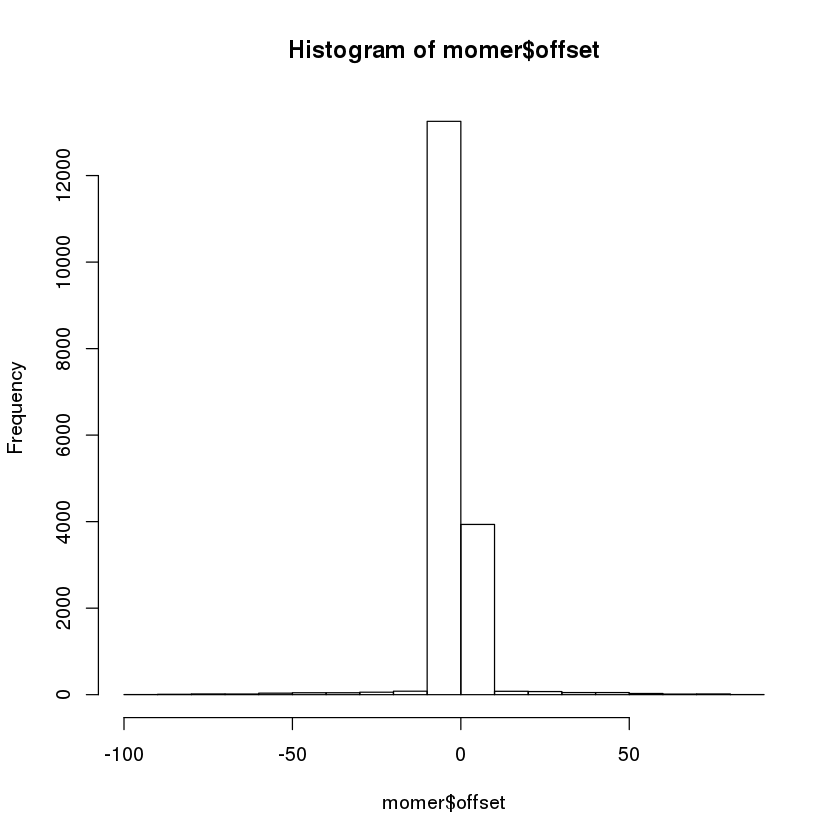

In [152]:
hist(momer$offset)

### Using annotate Peaks.pl

In [81]:
mot2 = read.table("annotated_peaks_nkx2521", sep="\t", header=T, fill=T)

Warning message in scan(file, what, nmax, sep, dec, quote, skip, nlines, na.strings, :
“EOF within quoted string”

In [85]:
mot2 = mot2[,c(1,22,23 )]

In [87]:
colnames(mot2)=c("peak", "NKX2.5", "NKX2.1")

In [88]:
dim(mot2)

[1] 18846     3

In [112]:
mot3=subset(mot2, rowSums (mot2[,c(2:3)]=="")<2)

In [115]:
head(mot3)

peak,NKX2.5,NKX2.1
chr1:202320931-202321293,"347(AAGCACTTGT,+,0.00)","175(AATACTTGAG,+,0.00)"
chr8:39928255-39928874,"210(AAGCACTTAA,+,0.00),219(ATCCACTCAA,+,0.00),338(TGAAGTGTTT,-,0.00),387(TCAAGTGCTG,-,0.00)","162(GTGAAGAGGT,-,0.00),211(AGCACTTAAT,+,0.00),220(TCCACTCAAA,+,0.00),337(CTGAAGTGTT,-,0.00),386(TTCAAGTGCT,-,0.00)"
chr12:50846026-50846318,"170(TCAAGTGCTT,-,0.00),190(AACCTCTCAA,+,0.00)","16(CTGGAGTGCG,-,0.00),169(CTCAAGTGCT,-,0.00),191(ACCTCTCAAA,+,0.00)"
chr17:74733107-74734609,"139(CTGAGTGGCG,-,0.00),689(AAGAGTGCTT,-,0.00),1045(GGCCCCTCAA,+,0.00),1450(TGAAGTGCCC,-,0.00)","138(TCTGAGTGGC,-,0.00),206(GCCTCTCAGG,+,0.00),1017(GGCACTTGGC,+,0.00),1449(TTGAAGTGCC,-,0.00)"
chr5:171710282-171710548,,"13(CTGGAGAGGG,-,0.00)"
chr15:89660686-89661168,,"180(CTCAAGTGTG,-,0.00),263(ACCTCTCATC,+,0.00)"


In [114]:
dim(mot2)
dim(mot3)

[1] 18846     3

[1] 15202     3

In [123]:
table(mot3$NKX2.1!="")


FALSE  TRUE 
 1163 14039 

In [155]:
11500/12663

[1] 0.9081576